# Logistic Regression

Here's an attempt to fit a logistic regression model to our exisiting data! Obviously more data preprocessing etc. will make the model better, but this notebook intends to show that a model can be successfully fit to the data.

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

In [102]:
y_test.shape

(5552, 1)

In [103]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean', keep_empty_features=True)
imp.fit(X_train)
X_train = imp.transform(X_train)
imp.fit(X_test)
X_test = imp.transform(X_test)
imp.fit(y_train)
y_train = imp.transform(y_train)
imp.fit(y_test)
y_test = imp.transform(y_test)

In [104]:
X_test.shape

(5552, 189)

In [105]:
X_train.shape

(12954, 189)

### Training the model
Here, we're training an out-of-the-box logisitic regression model to fit this data

In [165]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=500)

In [166]:
model.fit(X_train, y_train)

/Users/dylannguyen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear')

In [167]:
model.score(X_test, y_test)

0.5502521613832853

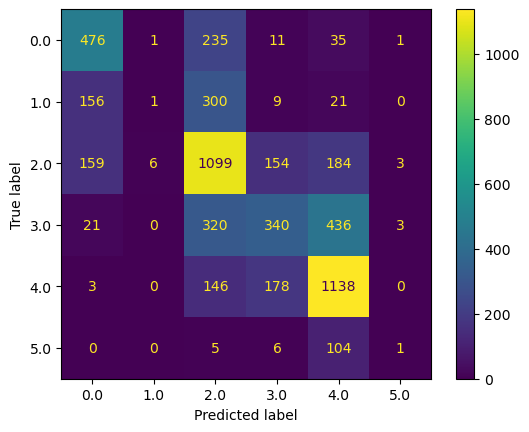

In [168]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [175]:
log_loss(y_test, model.predict_proba(X_test))

1.1506652473256276

The model has a prediction accuracy of around 56% on both the train and test(dev) sets, which suggests a high bias. We should probably look into using more/different means of regression to bring this up!

### Neural Network Model

Uses keras, tensorflow library

In [248]:
inputs = keras.Input(shape=(189,))
inputs.shape
# Create a Normalization layer and set its internal state using the training data
normalizer = layers.Normalization()
normalizer.adapt(X_train)

In [259]:
#loss is 1.12 on 200 epochs
dense = layers.Dense(256, activation="sigmoid")
x = normalizer(inputs)
x = layers.Dense(256, activation="sigmoid")(x)
x = tf.keras.layers.Dropout(0.8)(x)
x = layers.Dense(128, activation="sigmoid")(x)
x = layers.Dense(64, activation="sigmoid")(x)
outputs = layers.Dense(6, activation="softmax")(x)

In [260]:
model = keras.Model(inputs=inputs, outputs=outputs, name="ann_model")

In [261]:
model.summary()

Model: "ann_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 189)]             0         
                                                                 
 normalization_3 (Normalizat  (None, 189)              379       
 ion)                                                            
                                                                 
 dense_134 (Dense)           (None, 256)               48640     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_135 (Dense)           (None, 128)               32896     
                                                                 
 dense_136 (Dense)           (None, 64)                8256      
                                                         

In [264]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/200
162/162 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.5811 - val_loss: 1.0869 - val_accuracy: 0.5681
Epoch 2/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0744 - accuracy: 0.5808 - val_loss: 1.0850 - val_accuracy: 0.5673
Epoch 3/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0703 - accuracy: 0.5841 - val_loss: 1.0876 - val_accuracy: 0.5650
Epoch 4/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0731 - accuracy: 0.5800 - val_loss: 1.0896 - val_accuracy: 0.5681
Epoch 5/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0696 - accuracy: 0.5817 - val_loss: 1.0856 - val_accuracy: 0.5658
Epoch 6/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0686 - accuracy: 0.5808 - val_loss: 1.0876 - val_accuracy: 0.5666
Epoch 7/200
162/162 [==============================] - 0s 1ms/step - loss: 1.0696 - accuracy: 0.5859 - val_loss: 1.0889 - val_accuracy: 0.5643

162/162 [==============================] - 0s 965us/step - loss: 1.0577 - accuracy: 0.5885 - val_loss: 1.0837 - val_accuracy: 0.5716
Epoch 58/200
162/162 [==============================] - 0s 935us/step - loss: 1.0597 - accuracy: 0.5893 - val_loss: 1.0815 - val_accuracy: 0.5701
Epoch 59/200
162/162 [==============================] - 0s 928us/step - loss: 1.0575 - accuracy: 0.5876 - val_loss: 1.0874 - val_accuracy: 0.5650
Epoch 60/200
162/162 [==============================] - 0s 934us/step - loss: 1.0561 - accuracy: 0.5899 - val_loss: 1.0829 - val_accuracy: 0.5747
Epoch 61/200
162/162 [==============================] - 0s 942us/step - loss: 1.0554 - accuracy: 0.5861 - val_loss: 1.0863 - val_accuracy: 0.5673
Epoch 62/200
162/162 [==============================] - 0s 936us/step - loss: 1.0524 - accuracy: 0.5868 - val_loss: 1.0862 - val_accuracy: 0.5677
Epoch 63/200
162/162 [==============================] - 0s 937us/step - loss: 1.0557 - accuracy: 0.5891 - val_loss: 1.0811 - val_accuracy

162/162 [==============================] - 0s 934us/step - loss: 1.0490 - accuracy: 0.5947 - val_loss: 1.0860 - val_accuracy: 0.5650
Epoch 114/200
162/162 [==============================] - 0s 944us/step - loss: 1.0375 - accuracy: 0.5969 - val_loss: 1.0877 - val_accuracy: 0.5643
Epoch 115/200
162/162 [==============================] - 0s 933us/step - loss: 1.0470 - accuracy: 0.5897 - val_loss: 1.0846 - val_accuracy: 0.5654
Epoch 116/200
162/162 [==============================] - 0s 936us/step - loss: 1.0418 - accuracy: 0.5920 - val_loss: 1.0851 - val_accuracy: 0.5670
Epoch 117/200
162/162 [==============================] - 0s 979us/step - loss: 1.0419 - accuracy: 0.5925 - val_loss: 1.0841 - val_accuracy: 0.5670
Epoch 118/200
162/162 [==============================] - 0s 942us/step - loss: 1.0454 - accuracy: 0.5956 - val_loss: 1.0850 - val_accuracy: 0.5677
Epoch 119/200
162/162 [==============================] - 0s 934us/step - loss: 1.0478 - accuracy: 0.5952 - val_loss: 1.0831 - val_ac

Epoch 169/200
162/162 [==============================] - 0s 929us/step - loss: 1.0284 - accuracy: 0.6039 - val_loss: 1.0932 - val_accuracy: 0.5654
Epoch 170/200
162/162 [==============================] - 0s 937us/step - loss: 1.0372 - accuracy: 0.5974 - val_loss: 1.0913 - val_accuracy: 0.5720
Epoch 171/200
162/162 [==============================] - 0s 940us/step - loss: 1.0366 - accuracy: 0.5985 - val_loss: 1.0907 - val_accuracy: 0.5662
Epoch 172/200
162/162 [==============================] - 0s 940us/step - loss: 1.0313 - accuracy: 0.6010 - val_loss: 1.0902 - val_accuracy: 0.5670
Epoch 173/200
162/162 [==============================] - 0s 934us/step - loss: 1.0322 - accuracy: 0.5994 - val_loss: 1.0920 - val_accuracy: 0.5646
Epoch 174/200
162/162 [==============================] - 0s 929us/step - loss: 1.0346 - accuracy: 0.5989 - val_loss: 1.0879 - val_accuracy: 0.5654
Epoch 175/200
162/162 [==============================] - 0s 944us/step - loss: 1.0328 - accuracy: 0.6021 - val_loss: 1

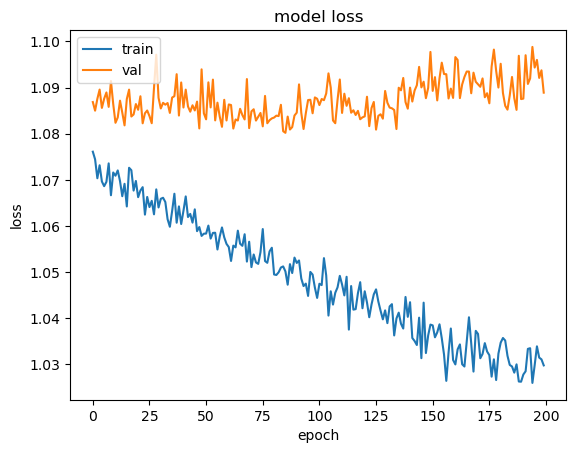

In [265]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()